### This notebook can be ignored since the graphs from the SD Metrics library are visually more appealing. At the beginning of this study the SD Metrics library did not work therefore, the distribution graphs were checked by hand.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [2]:
num_testsub = 32
num_classes = 4
num_channel = 40
num_datapoints = 8064
num_trials = 40
sampling_rate = 128 # 128Hz as given in the data

def loadfiles_normalized():
    data_dict = {}
    print("Loading files into data_dict .................")
    for i in range(num_testsub):
                    if i < 10:
                        name = '%0*d' % (2,i+1)
                    else:
                        name = i+1
                    fname = 'data/data_prepared/data_norm_bhat/noramlized_datasub'+str(name) +'.npy'
                    data_dict["sub%s" %name] = np.load(fname)    
    print("Loaded!!!!!") 
    return data_dict

In [3]:
data_dict = loadfiles_normalized()

Loading files into data_dict .................
Loaded!!!!!


In [4]:
data = np.zeros((0,40,99))
data[:] = np.nan

for sub in data_dict.keys():
        data = np.concatenate((data, data_dict[sub]), axis=0)

In [5]:
data.shape

(1280, 40, 99)

In [6]:
ch1 = data[:,0,:]

In [7]:
# get features
list_of_features = []  
for i in range(99):
    featureX = np.zeros((1280,40))
    featureX[:] = np.nan
    for j in range(40):
        temp = data[:,j,i]
        featureX[:,j] = temp
    list_of_features.append(featureX)

In [8]:
np.isnan(featureX).any()

False

In [10]:
len(list_of_features)

99

In [9]:
ch1.shape

(1280, 99)

<AxesSubplot: ylabel='Count'>

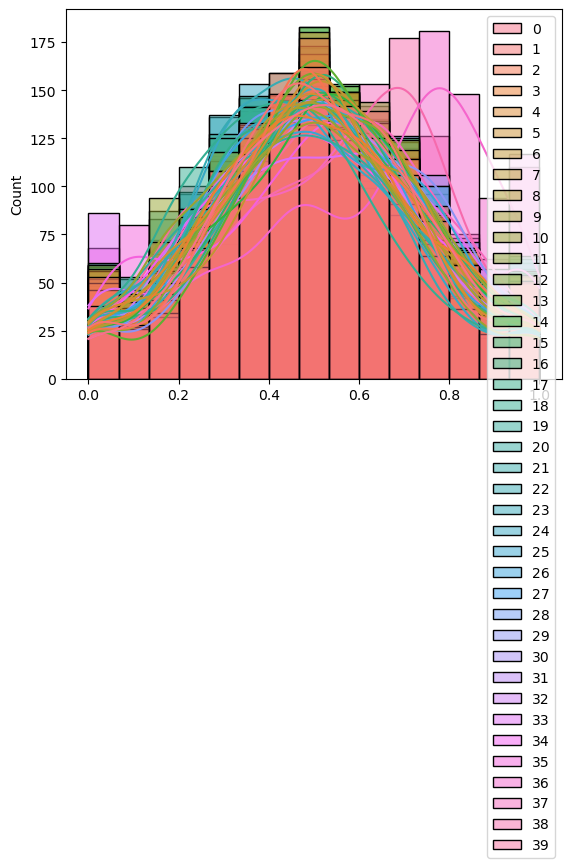

In [11]:
sns.histplot(list_of_features[0], kde=True, bins=15)

<AxesSubplot: ylabel='Count'>

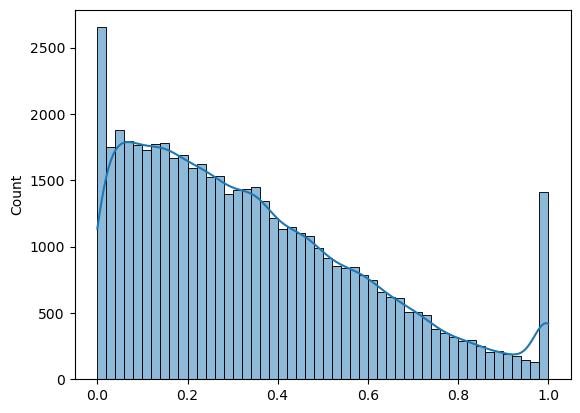

In [12]:
sns.histplot(list_of_features[2].flatten(), kde=True, bins=50)

## Generated Data

In [13]:
arrays = []
for i in range(10):
    arrays.append(torch.load("data/sampled/0x/1_sample/sampled_01_128_"+str(i),map_location=torch.device('cpu')))
generated_data = np.concatenate(arrays, axis=0)

In [14]:
generated_data.shape

(1280, 1, 40, 104)

In [15]:
X_argument2 = np.zeros((1280,40,99))
X_argument2[:] = np.nan

for i in range(1280):
        X_argument2[i] = generated_data[i][0][:,:99]    

In [16]:
# get features
list_of_features_fake_train_1d = []  
for i in range(99):
    featureX = np.zeros((1280,40))
    featureX[:] = np.nan
    for j in range(40):
        temp = X_argument2[:,j,i]
        featureX[:,j] = temp
    list_of_features_fake_train_1d.append(featureX)

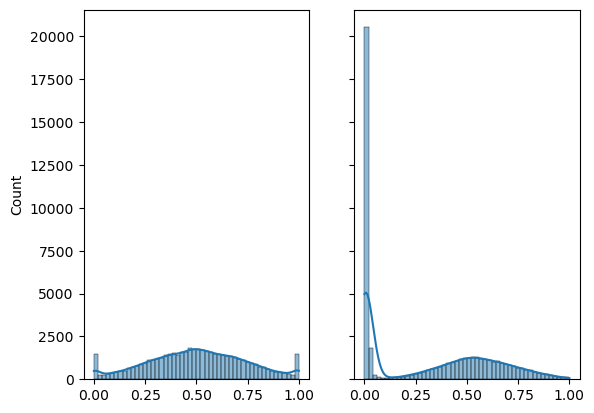

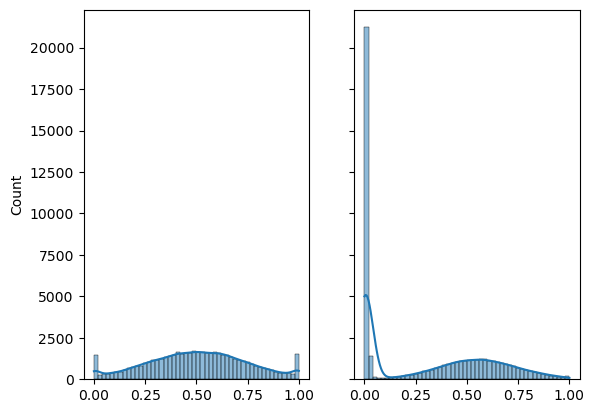

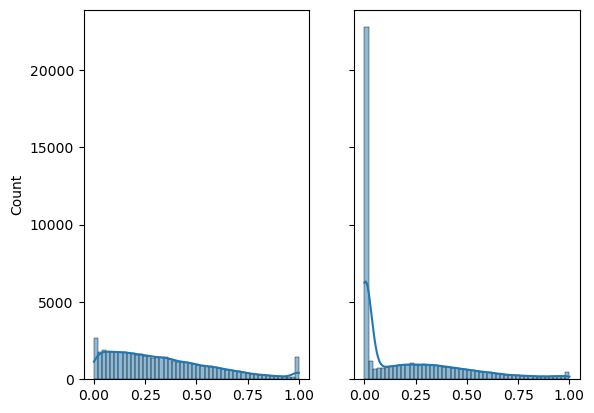

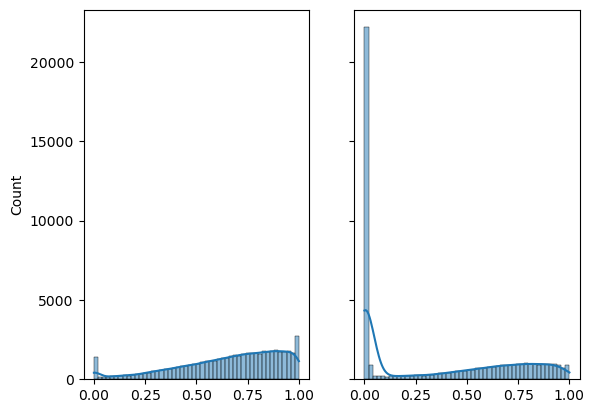

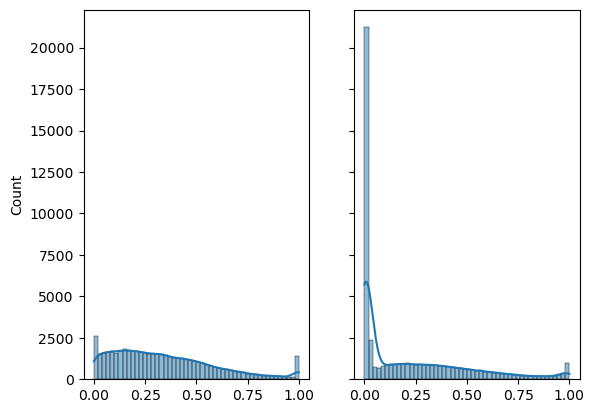

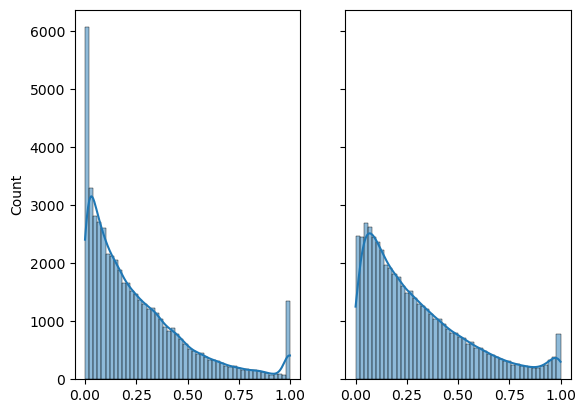

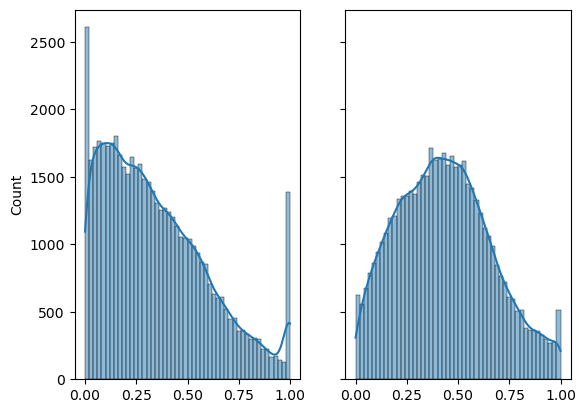

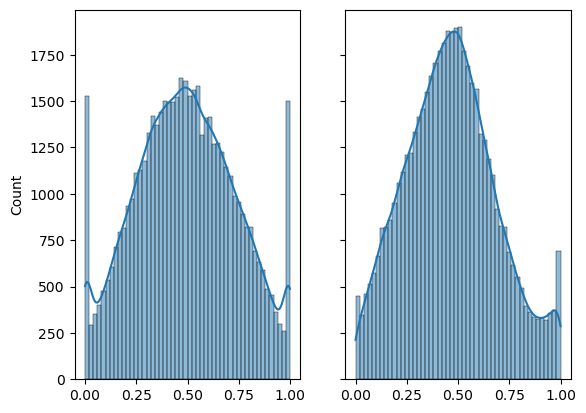

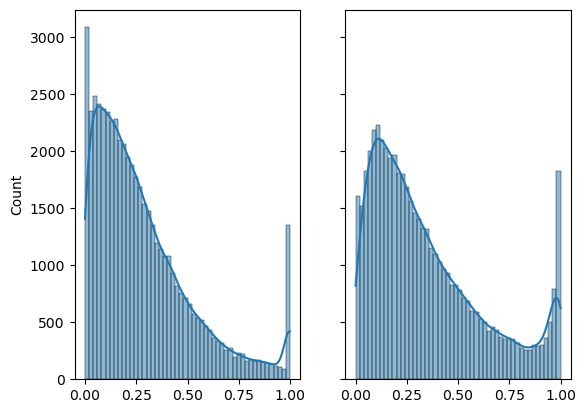

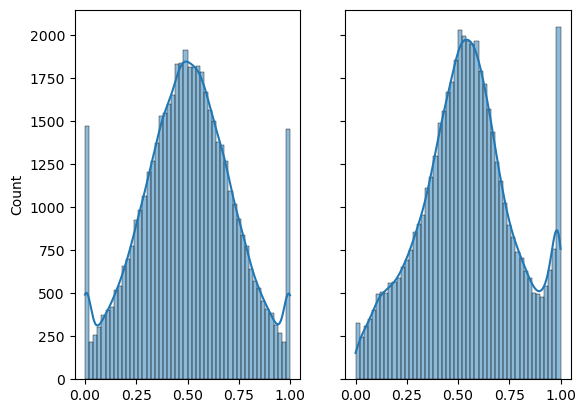

In [17]:
for i in range(10):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    sns.histplot(list_of_features[i].flatten(), kde=True, bins=50, ax=ax1)
    sns.histplot(list_of_features_fake_train_1d[i].flatten(), kde=True, bins=50, ax=ax2)

-------

In [19]:
arrays = []
for i in range(10):
    arrays.append(torch.load("data/sampled/0xx/1_sample/sampled_03_128_"+str(i),map_location=torch.device('cpu')))
generated_data = np.concatenate(arrays, axis=0)

In [20]:
X_argument2 = np.zeros((1280,40,99))
X_argument2[:] = np.nan

for i in range(1280):
        X_argument2[i] = generated_data[i][0][:,:99]    

In [21]:
# get features
list_of_features_fake_train_1d = []  
for i in range(99):
    featureX = np.zeros((1280,40))
    featureX[:] = np.nan
    for j in range(40):
        temp = X_argument2[:,j,i]
        featureX[:,j] = temp
    list_of_features_fake_train_1d.append(featureX)

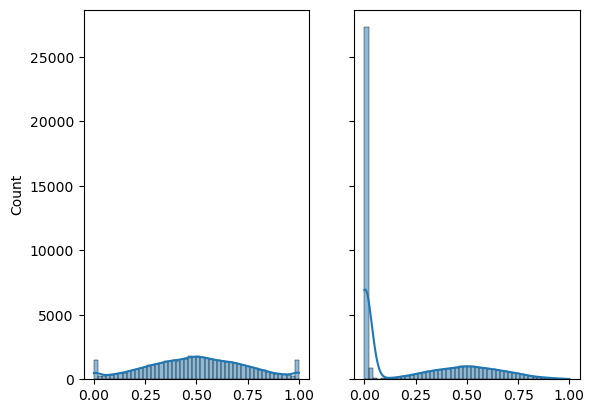

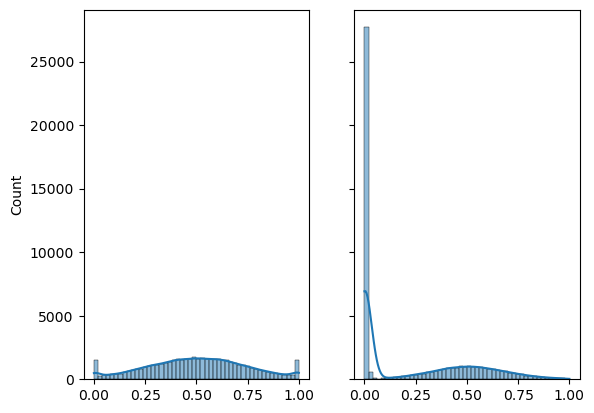

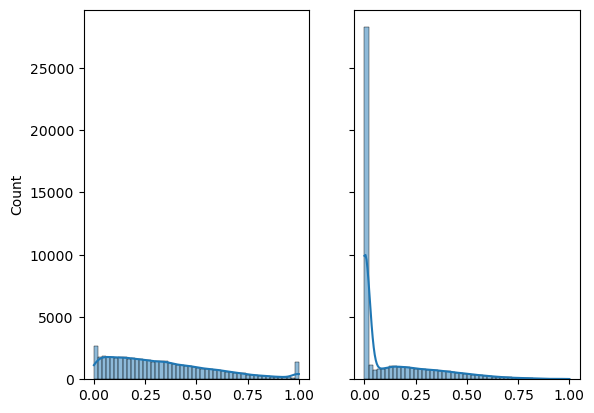

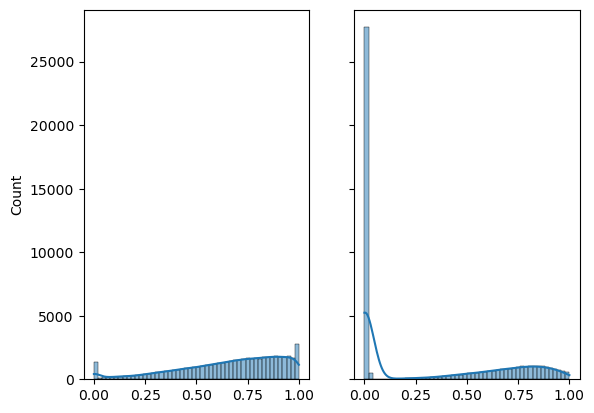

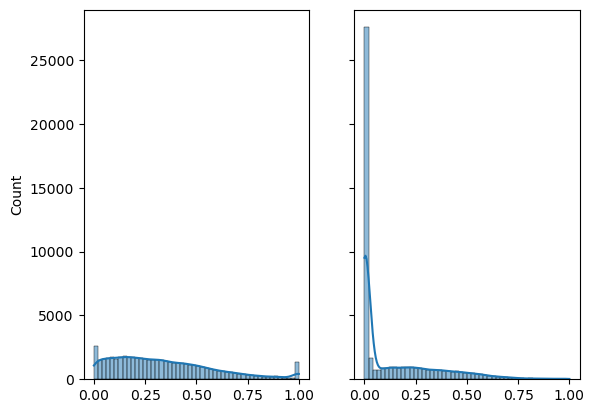

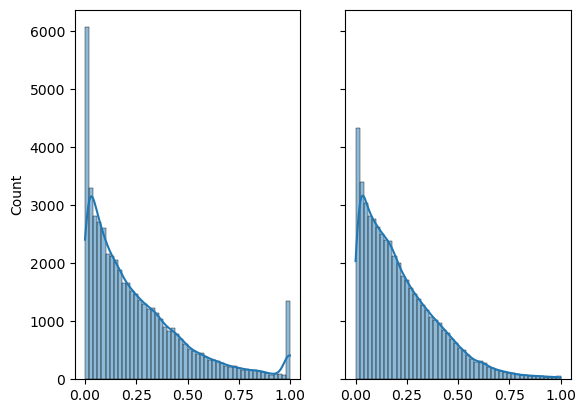

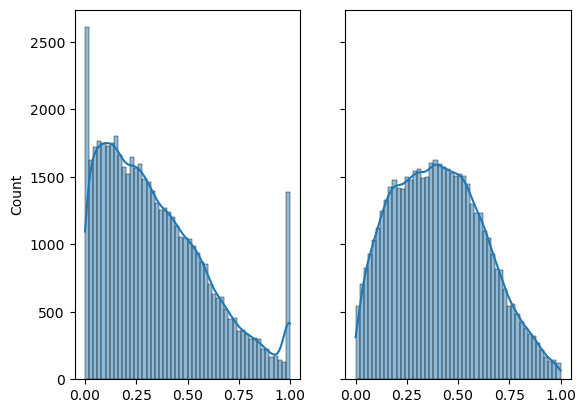

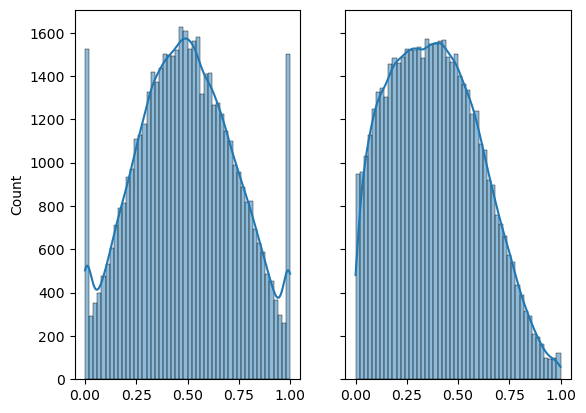

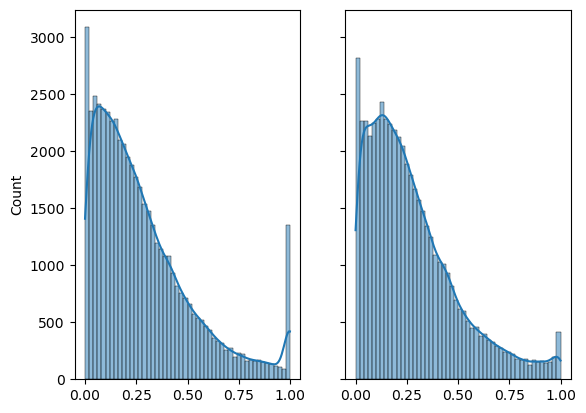

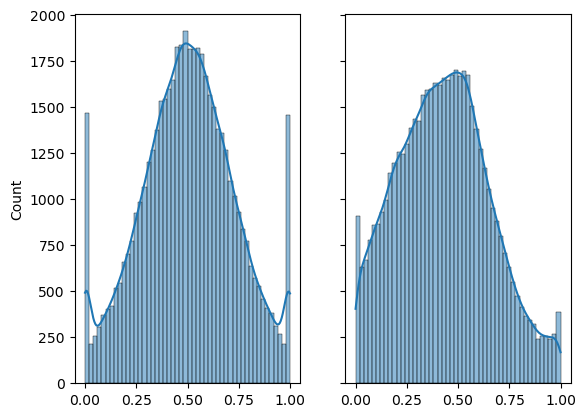

In [22]:
for i in range(10):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    sns.histplot(list_of_features[i].flatten(), kde=True, bins=50, ax=ax1)
    sns.histplot(list_of_features_fake_train_1d[i].flatten(), kde=True, bins=50, ax=ax2)